#Data Ingestion

In [4]:
import pandas as pd

# Data ingestion
data = pd.read_csv("/content/hotel_bookings.csv")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [5]:
data.shape

(119390, 32)

#Data Understanding

In [6]:
#Column names
print("Column Names:")
print(data.columns)

Column Names:
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


**hotel** : There are only two hotel types: Resort Hotel or City Hotel

**is_canceled** : "Value indicating if the booking was canceled (1) or not (0)

**lead_time**: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

**stays_in_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**stays_in_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**meal**: Type of meal booked. Categories are presented in standard hospitality meal packages:
Undefined/SC – no meal package
BB – Bed & Breakfast
HB – Half board (breakfast and one other meal – usually dinner)
FB – Full board (breakfast, lunch and dinner)

**country**: Country of origin. Categories are represented in the ISO 3155–3:2013 format

**market_segment**: Market segment designation.
“TA” means “Travel Agents”
“TO” means “Tour Operators”

**distribution_channel**: Booking distribution channel.
“TA” means “Travel Agents”
“TO” means “Tour Operators”

**is_repeated_guest**: Value indicating if the booking name was from a repeated guest (1) or not (0)

**previous_cancellations**: Number of previous bookings that were cancelled by the customer prior to the current booking

**previous_bookings_not_canceled**: Number of previous bookings not cancelled by the customer prior to the current booking

**reserved_room_type**: Code of room type reserved.

assigned_room_type: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request.

**booking_changes**: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

**deposit_type**: Indication on if the customer made a deposit to guarantee the booking.

**This variable can assume three categories:**
No Deposit – no deposit was made
Non Refund – a deposit was made in the value of the total stay cost
Refundable – a deposit was made with a value under the total cost of stay

**agent**: ID of the travel agency that made the booking

**company**: ID of the company/entity that made the booking or responsible for paying the booking.

**days_in_waiting_list**: Number of days the booking was in the waiting list before it was confirmed to the customer

**customer_type**: Type of booking, assuming one of four categories:
Contract - when the booking has an allotment or other type of contract associated to it
Group – when the booking is associated to a group
Transient – when the booking is not part of a group or contract, and is not associated to other Transient parties
Transient Party - when the booking is transient, but is associated to at least other transient booking

**adr**: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

**required_car_parking_spaces**: Number of car parking spaces required by the customer

**total_of_special_requests**: Number of special requests made by the customer (e.g. twin bed or high floor)

**reservation_status**: Reservation last status, assuming one of three categories:
Canceled – booking was canceled by the customer
Check-Out – customer has checked in but already departed
No-Show – customer did not check-in and did inform the hotel of the reason why

**reservation_status_date**: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

In [7]:
# Show the data type of each column
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [8]:
# Give information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
#Generate deecriptive statistic summary of all numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [10]:
# Show the number of unique observations for each column
data.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [11]:
# Show all the unique hotel types in the ‘hotel’ column
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [12]:
# Count the unique values in the hotel column
data['hotel'].value_counts()

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

In [13]:
data['meal'].value_counts()

meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

In [14]:
data["babies"].value_counts()

babies
0     118473
1        900
2         15
10         1
9          1
Name: count, dtype: int64

In [15]:
data['adults'].value_counts()

adults
2     89680
1     23027
3      6202
0       403
4        62
26        5
5         2
27        2
20        2
40        1
55        1
50        1
6         1
10        1
Name: count, dtype: int64

# Data Cleaning

In [16]:
#Checking the missing values

data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [17]:
#missing values as a percentage
null_values_percentage = (data.isnull().sum()/len(data))*100
null_values_percentage

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [18]:
#lets drop the column company
data.drop(columns=['company'], inplace= True )

In [19]:
# beacause the percentage of nan values is really low lets errase the nana instances of this 2 columns
data.dropna(subset=  ['children','country'], inplace = True)

In [20]:
#since agent is a ID category we substitute the nan values with the mode
data.fillna(data['agent'].mode()[0], inplace = True)

In [21]:
# lets see if the nan values where handeled
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [22]:
#drop irrational data
data.drop([46619,78656], axis=0, inplace=True)

#Feature Engineering and Selection

In [23]:
# Copy hotel dataframe into a new one that will be engineered
hotel_eng = pd.DataFrame()
hotel_eng = data.copy()

In [24]:
# First lets start by transforming the months colum into a numerical one mapping the names of the months into the month number
month_to_number = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Map month names to month numbers using the dictionary
hotel_eng['arrival_date_month'] = hotel_eng['arrival_date_month'].map(month_to_number)

# Lets combine the 3 arrival colums into a single one named arrival_date
hotel_eng['arrival_date'] = pd.to_datetime(hotel_eng['arrival_date_year'].astype(str) + '-' +
                                    hotel_eng['arrival_date_month'].astype(str) + '-' +
                                    hotel_eng['arrival_date_day_of_month'].astype(str))

In [25]:
hotel_eng.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,01-07-2015,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,01-07-2015,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,No Deposit,9.0,0,Transient,75.0,0,0,Check-Out,02-07-2015,2015-07-01
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,02-07-2015,2015-07-01
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,03-07-2015,2015-07-01


In [26]:
# we now have the arrive month as a number the column, redundant with arrival_date_week_number so drop (strong correlation, bad for ML models input)
hotel_eng.drop(columns=['arrival_date_week_number'], inplace= True )

In [27]:
#show the categories in the reservation_status
hotel_eng['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

Dropping the columns "reservation_status" and "reservation_status_date" is important because they directly reveal whether a booking was canceled or not, which would unfairly influence our prediction model and cause data leakage.

In [28]:
# droping the 2 columns mentioned above

hotel_eng.drop(columns=['reservation_status','reservation_status_date'], inplace= True )

#Exploratory Data Analysis

In [29]:
hotel_eng.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'arrival_date'],
      dtype='object')

In [30]:
hotel_eng.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date
0,Resort Hotel,0,342,2015,7,1,0,0,2,0.0,...,C,3,No Deposit,9.0,0,Transient,0.0,0,0,2015-07-01
1,Resort Hotel,0,737,2015,7,1,0,0,2,0.0,...,C,4,No Deposit,9.0,0,Transient,0.0,0,0,2015-07-01
2,Resort Hotel,0,7,2015,7,1,0,1,1,0.0,...,C,0,No Deposit,9.0,0,Transient,75.0,0,0,2015-07-01
3,Resort Hotel,0,13,2015,7,1,0,1,1,0.0,...,A,0,No Deposit,304.0,0,Transient,75.0,0,0,2015-07-01
4,Resort Hotel,0,14,2015,7,1,0,2,2,0.0,...,A,0,No Deposit,240.0,0,Transient,98.0,0,1,2015-07-01


#Bar plot for cancellation and non_ cacellation

<ipython-input-31-79794088a350>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=percentage.index, y=percentage, palette=['darkturquoise', 'royalblue'])


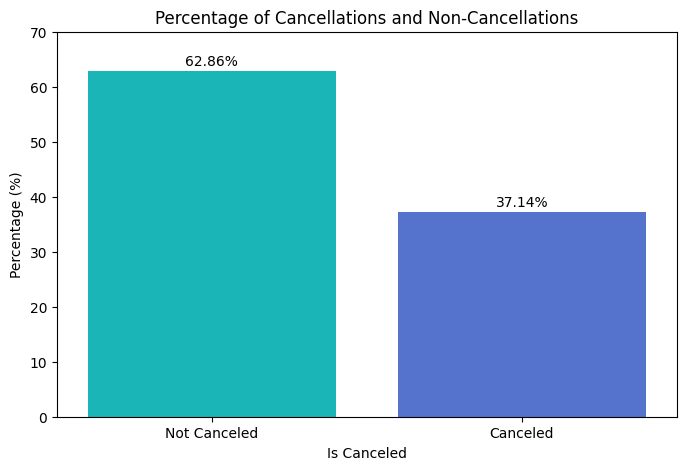

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculating the percentage of each class
percentage = hotel_eng['is_canceled'].value_counts(normalize=True) * 100

# Plotting the percentage of each class
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percentage.index, y=percentage, palette=['darkturquoise', 'royalblue'])
plt.title('Percentage of Cancellations and Non-Cancellations')
plt.xlabel('Is Canceled')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])
plt.yticks(ticks=range(0,80,10))

# Displaying the percentage on the bars
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

#Box plot for hotel

In [32]:
import plotly.express as px

# Assuming 'df' is your DataFrame and is already defined
data = hotel_eng[hotel_eng['is_canceled'] == 0]

fig = px.box(
    data_frame=data,
    x='reserved_room_type',
    y='adr',
    color='hotel',
    template='plotly_dark'
)

fig.show()


# Separating the numerical and categorical columns

In [33]:
hotel_eng_ny=hotel_eng.drop(columns=['arrival_date','arrival_date_year'],axis=1)

In [34]:
#lets select the categorical coluns to make some count plots
hotel_eng_ny_cat = hotel_eng_ny.select_dtypes(include=['object'])
hotel_eng_ny_cat

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
0,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,Transient
1,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,Transient
2,Resort Hotel,BB,GBR,Direct,Direct,A,C,No Deposit,Transient
3,Resort Hotel,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient
4,Resort Hotel,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient
...,...,...,...,...,...,...,...,...,...
119385,City Hotel,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient
119386,City Hotel,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient
119387,City Hotel,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient
119388,City Hotel,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient


In [35]:
# Drop non-numerical variables
hotel_eng_ny_num=hotel_eng_ny.drop(columns=hotel_eng_ny_cat.columns )
hotel_eng_ny_num

,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,7,1,0,0,2,0.0,0,0,0,0,3,9.0,0,0.00,0,0
1,0,737,7,1,0,0,2,0.0,0,0,0,0,4,9.0,0,0.00,0,0
2,0,7,7,1,0,1,1,0.0,0,0,0,0,0,9.0,0,75.00,0,0
3,0,13,7,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.00,0,0
4,0,14,7,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,8,30,2,5,2,0.0,0,0,0,0,0,394.0,0,96.14,0,0
119386,0,102,8,31,2,5,3,0.0,0,0,0,0,0,9.0,0,225.43,0,2
119387,0,34,8,31,2,5,2,0.0,0,0,0,0,0,9.0,0,157.71,0,4
119388,0,109,8,31,2,5,2,0.0,0,0,0,0,0,89.0,0,104.40,0,0


# Correlation Matrix Heatmap

In [36]:
import plotly.graph_objects as go

# Assuming 'hotel_eng_ny_num' is your DataFrame with numerical columns
cormat = hotel_eng_ny_num.corr()

# Create the heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
    z=cormat.values,
    x=cormat.columns,
    y=cormat.index,
    colorscale='RdBu',  # Choose a suitable colorscale
    zmin=-1, zmax=1,  # Set the color scale range (-1 to 1 for correlation)
    colorbar=dict(title='Correlation'),  # Add color bar with title
))

# Customize layout
fig.update_layout(
    title='Correlation Matrix Heatmap',
    xaxis=dict(title='Features'),
    yaxis=dict(title='Features'),
    width=1000,
    height=800,
    template='plotly_dark'
)

# Show plot
fig.show()

#Data Preparation

 Encoding of categorical columns

In [37]:
#descriptive stats from the cat variables
hotel_eng_ny_cat.describe().T

,count,unique,top,freq
hotel,118896,2,City Hotel,79300
meal,118896,5,BB,91861
country,118896,177,PRT,48585
market_segment,118896,7,Online TA,56401
distribution_channel,118896,5,TA/TO,97729
reserved_room_type,118896,10,A,85600
assigned_room_type,118896,12,A,73863
deposit_type,118896,3,No Deposit,104161
customer_type,118896,4,Transient,89173


country has 177 unique values, with the vast majority PRT,its irrelevant
so the column has been dropped.

In [38]:
# drop country as encoding it does not introduce information for the models
hotel_eng_ny_cat.drop(columns=['country'],inplace=True)

In [39]:
hotel_eng_ny_cat

,hotel,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
0,Resort Hotel,BB,Direct,Direct,C,C,No Deposit,Transient
1,Resort Hotel,BB,Direct,Direct,C,C,No Deposit,Transient
2,Resort Hotel,BB,Direct,Direct,A,C,No Deposit,Transient
3,Resort Hotel,BB,Corporate,Corporate,A,A,No Deposit,Transient
4,Resort Hotel,BB,Online TA,TA/TO,A,A,No Deposit,Transient
...,...,...,...,...,...,...,...,...
119385,City Hotel,BB,Offline TA/TO,TA/TO,A,A,No Deposit,Transient
119386,City Hotel,BB,Online TA,TA/TO,E,E,No Deposit,Transient
119387,City Hotel,BB,Online TA,TA/TO,D,D,No Deposit,Transient
119388,City Hotel,BB,Online TA,TA/TO,A,A,No Deposit,Transient


In [40]:
#encode the dummies
X_encoded=pd.get_dummies(hotel_eng_ny_cat)

#replace space with '-'
X_encoded.columns = X_encoded.columns.str.replace(' ', '-')

In [41]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118896 entries, 0 to 119389
Data columns (total 48 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   hotel_City-Hotel                118896 non-null  bool 
 1   hotel_Resort-Hotel              118896 non-null  bool 
 2   meal_BB                         118896 non-null  bool 
 3   meal_FB                         118896 non-null  bool 
 4   meal_HB                         118896 non-null  bool 
 5   meal_SC                         118896 non-null  bool 
 6   meal_Undefined                  118896 non-null  bool 
 7   market_segment_Aviation         118896 non-null  bool 
 8   market_segment_Complementary    118896 non-null  bool 
 9   market_segment_Corporate        118896 non-null  bool 
 10  market_segment_Direct           118896 non-null  bool 
 11  market_segment_Groups           118896 non-null  bool 
 12  market_segment_Offline-TA/TO    118896 non-null  

#Combine the numerical and encoded categorical dataframes

In [42]:
# combining the numerical colums with the encoded variables

data = hotel_eng_ny_num.join(X_encoded, lsuffix='_left', rsuffix='_right')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118896 entries, 0 to 119389
Data columns (total 66 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118896 non-null  int64  
 1   lead_time                       118896 non-null  int64  
 2   arrival_date_month              118896 non-null  int64  
 3   arrival_date_day_of_month       118896 non-null  int64  
 4   stays_in_weekend_nights         118896 non-null  int64  
 5   stays_in_week_nights            118896 non-null  int64  
 6   adults                          118896 non-null  int64  
 7   children                        118896 non-null  float64
 8   babies                          118896 non-null  int64  
 9   is_repeated_guest               118896 non-null  int64  
 10  previous_cancellations          118896 non-null  int64  
 11  previous_bookings_not_canceled  118896 non-null  int64  
 12  booking_changes      

In [44]:
data.head()

,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No-Deposit,deposit_type_Non-Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,7,1,0,0,2,0.0,0,0,...,False,False,False,True,False,False,False,False,True,False
1,0,737,7,1,0,0,2,0.0,0,0,...,False,False,False,True,False,False,False,False,True,False
2,0,7,7,1,0,1,1,0.0,0,0,...,False,False,False,True,False,False,False,False,True,False
3,0,13,7,1,0,1,1,0.0,0,0,...,False,False,False,True,False,False,False,False,True,False
4,0,14,7,1,0,2,2,0.0,0,0,...,False,False,False,True,False,False,False,False,True,False


#Splitting independent and target variable

In [45]:
# y is target variable
y = data['is_canceled']
y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 118896, dtype: int64

In [46]:
# x is i independent variable
X = data.drop(['is_canceled'], axis=1)

In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118896 entries, 0 to 119389
Data columns (total 65 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lead_time                       118896 non-null  int64  
 1   arrival_date_month              118896 non-null  int64  
 2   arrival_date_day_of_month       118896 non-null  int64  
 3   stays_in_weekend_nights         118896 non-null  int64  
 4   stays_in_week_nights            118896 non-null  int64  
 5   adults                          118896 non-null  int64  
 6   children                        118896 non-null  float64
 7   babies                          118896 non-null  int64  
 8   is_repeated_guest               118896 non-null  int64  
 9   previous_cancellations          118896 non-null  int64  
 10  previous_bookings_not_canceled  118896 non-null  int64  
 11  booking_changes                 118896 non-null  int64  
 12  agent                

In [48]:
X.head()

,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No-Deposit,deposit_type_Non-Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,342,7,1,0,0,2,0.0,0,0,0,...,False,False,False,True,False,False,False,False,True,False
1,737,7,1,0,0,2,0.0,0,0,0,...,False,False,False,True,False,False,False,False,True,False
2,7,7,1,0,1,1,0.0,0,0,0,...,False,False,False,True,False,False,False,False,True,False
3,13,7,1,0,1,1,0.0,0,0,0,...,False,False,False,True,False,False,False,False,True,False
4,14,7,1,0,2,2,0.0,0,0,0,...,False,False,False,True,False,False,False,False,True,False


In [49]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model Training and Evaluation

Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_train_predictions = rf_model.predict(X_train)
rf_test_predictions = rf_model.predict(X_test)

# Classification Reports
print("Random Forest - Training Set")
print(classification_report(y_train, rf_train_predictions))
print("Random Forest - Testing Set")
print(classification_report(y_test, rf_test_predictions))

Random Forest - Training Set
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     59884
           1       0.99      0.99      0.99     35232

    accuracy                           0.99     95116
   macro avg       0.99      0.99      0.99     95116
weighted avg       0.99      0.99      0.99     95116

Random Forest - Testing Set
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     14859
           1       0.87      0.77      0.81      8921

    accuracy                           0.87     23780
   macro avg       0.87      0.85      0.86     23780
weighted avg       0.87      0.87      0.87     23780



Confusion Matrix
[[13830  1029]
 [ 2054  6867]]
False Positive Rate: 0.06925095901473854
False Negative Rate: 0.23024324627283937
True Negative Rate: 0.9307490409852615
Negative Predictive Value: 0.8706874842608915
False Discovery Rate: 0.13031914893617022
True Positive Rate: 0.7697567537271607
Positive Predictive Value: 0.8696808510638298
Accuracy: 0.8703532380151388
F1 Score: 0.8166736040910983
F2 Score: 0.7878614043139056
Cohen's Kappa: 0.7169657771287801
Matthews Correlation Coefficient: 0.7201613077058201
ROC AUC Score: 0.9356540842360817
Precision-Recall AUC Score: 0.9166575352833416
Log Loss: 0.33683243681007935
Brier Score: 0.09324245071386396


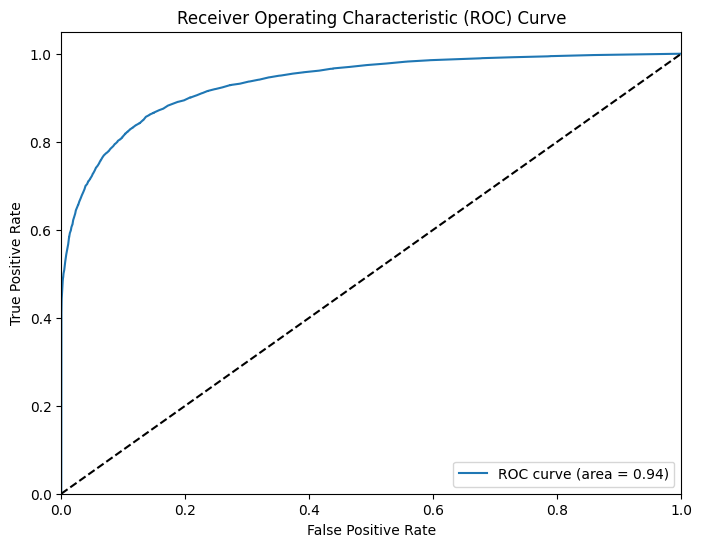

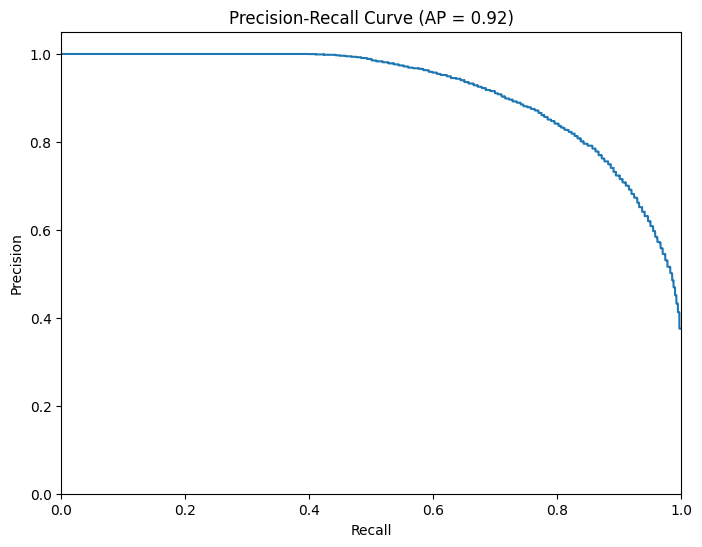

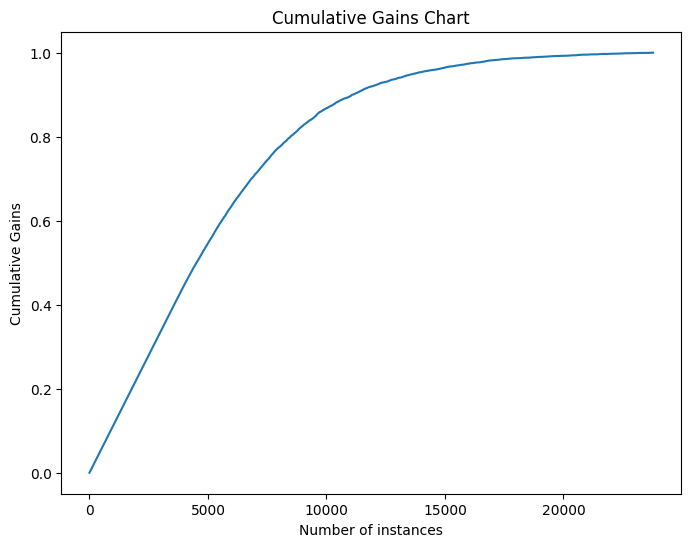

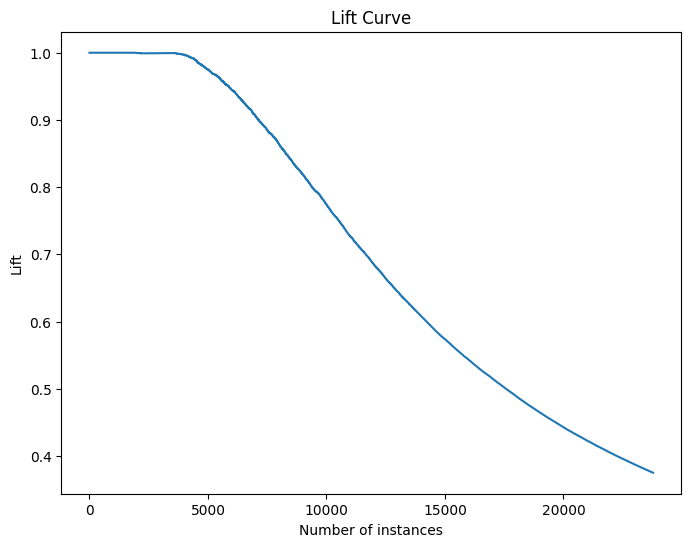

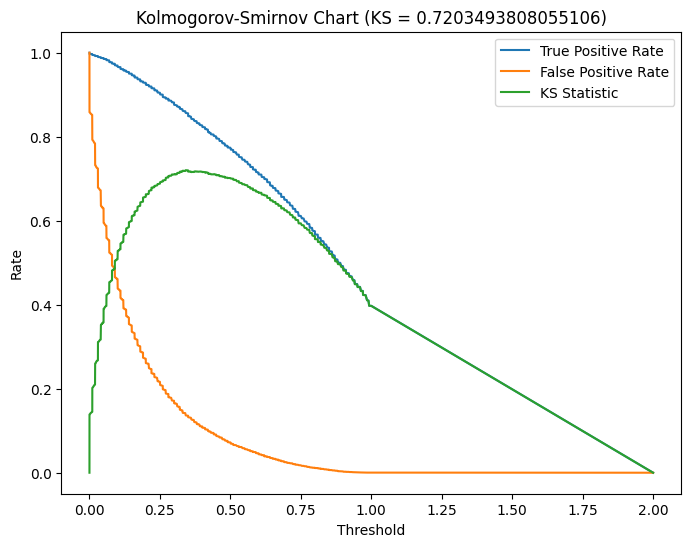

In [51]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, classification_report, cohen_kappa_score, matthews_corrcoef, precision_recall_curve, average_precision_score, log_loss, brier_score_loss
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Assuming you have trained and tested your RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_train_predictions = rf_model.predict(X_train)
rf_test_predictions = rf_model.predict(X_test)
rf_test_probabilities = rf_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# False Positive Rate
def false_positive_rate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    fp = cm[0, 1]
    tn = cm[0, 0]
    return fp / (fp + tn)

# False Negative Rate
def false_negative_rate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    fn = cm[1, 0]
    tp = cm[1, 1]
    return fn / (fn + tp)

# True Negative Rate
def true_negative_rate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0, 0]
    fp = cm[0, 1]
    return tn / (tn + fp)

# Negative Predictive Value
def negative_predictive_value(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0, 0]
    fn = cm[1, 0]
    return tn / (tn + fn)

# False Discovery Rate
def false_discovery_rate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    fp = cm[0, 1]
    tp = cm[1, 1]
    return fp / (fp + tp)

# True Positive Rate
def true_positive_rate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tp = cm[1, 1]
    fn = cm[1, 0]
    return tp / (tp + fn)

# Positive Predictive Value
def positive_predictive_value(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tp = cm[1, 1]
    fp = cm[0, 1]
    return tp / (tp + fp)

# Accuracy
def accuracy(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tp = cm[1, 1]
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]
    return (tp + tn) / (tp + tn + fp + fn)

# F beta score
def f_beta_score(y_true, y_pred, beta):
    precision = positive_predictive_value(y_true, y_pred)
    recall = true_positive_rate(y_true, y_pred)
    return (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

# F1 score
def f1_score(y_true, y_pred):
    return f_beta_score(y_true, y_pred, beta=1)

# F2 score
def f2_score(y_true, y_pred):
    return f_beta_score(y_true, y_pred, beta=2)

# Matthews Correlation Coefficient
def matthews_correlation_coefficient(y_true, y_pred):
    return matthews_corrcoef(y_true, y_pred)

# Precision-Recall Curve
def plot_precision_recall_curve(y_true, y_prob, figsize=(8, 6)):
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    average_precision = average_precision_score(y_true, y_prob)
    plt.figure(figsize=figsize)
    plt.step(recall, precision, where='post')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve (AP = {0:0.2f})'.format(average_precision))
    plt.show()

# ROC Curve
def plot_roc_curve(y_true, y_prob, figsize=(8, 6)):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=figsize)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Precision-Recall AUC
def pr_auc_score(y_true, y_prob):
    return average_precision_score(y_true, y_prob)

# Log loss
def calculate_log_loss(y_true, y_prob):
    return log_loss(y_true, y_prob)

# Brier score
def calculate_brier_score(y_true, y_prob):
    return brier_score_loss(y_true, y_prob)

# Cumulative gains chart
def plot_cumulative_gains_chart(y_true, y_prob, figsize=(8, 6)):
    sorted_prob = np.argsort(y_prob)[::-1]
    cumulative_positives = np.cumsum(y_true.to_numpy()[sorted_prob])  # Convert to NumPy array
    cumulative_gain = cumulative_positives / np.sum(y_true)
    plt.figure(figsize=figsize)
    plt.plot(np.arange(1, len(y_true) + 1), cumulative_gain)
    plt.xlabel('Number of instances')
    plt.ylabel('Cumulative Gains')
    plt.title('Cumulative Gains Chart')
    plt.show()

# Lift curve
def plot_lift_curve(y_true, y_prob, figsize=(8, 6)):
    sorted_prob = np.argsort(y_prob)[::-1]
    cumulative_positives = np.cumsum(y_true.to_numpy()[sorted_prob])  # Convert to NumPy array
    lift = cumulative_positives / np.arange(1, len(y_true) + 1)
    plt.figure(figsize=figsize)
    plt.plot(np.arange(1, len(y_true) + 1), lift)
    plt.xlabel('Number of instances')
    plt.ylabel('Lift')
    plt.title('Lift Curve')
    plt.show()

# Kolmogorov-Smirnov plot
def plot_ks_chart(y_true, y_prob, figsize=(8, 6)):
    plt.figure(figsize=figsize)
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    ks = np.max(np.abs(tpr - fpr))
    plt.plot(thresholds, tpr, label='True Positive Rate')
    plt.plot(thresholds, fpr, label='False Positive Rate')
    plt.plot(thresholds, np.abs(tpr - fpr), label='KS Statistic')
    plt.xlabel('Threshold')
    plt.ylabel('Rate')
    plt.title('Kolmogorov-Smirnov Chart (KS = {})'.format(ks))
    plt.legend()
    plt.show()

# Calculate metrics
def calculate_metrics(y_true, y_pred, y_prob):
    metrics = {
        "Confusion Matrix": confusion_matrix(y_true, y_pred),
        "False Positive Rate": false_positive_rate(y_true, y_pred),
        "False Negative Rate": false_negative_rate(y_true, y_pred),
        "True Negative Rate": true_negative_rate(y_true, y_pred),
        "Negative Predictive Value": negative_predictive_value(y_true, y_pred),
        "False Discovery Rate": false_discovery_rate(y_true, y_pred),
        "True Positive Rate": true_positive_rate(y_true, y_pred),
        "Positive Predictive Value": positive_predictive_value(y_true, y_pred),
        "Accuracy": accuracy(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "F2 Score": f2_score(y_true, y_pred),
        "Cohen's Kappa": cohen_kappa_score(y_true, y_pred),
        "Matthews Correlation Coefficient": matthews_correlation_coefficient(y_true, y_pred),
        "ROC AUC Score": roc_auc_score(y_true, y_prob),
        "Precision-Recall AUC Score": pr_auc_score(y_true, y_prob),
        "Log Loss": calculate_log_loss(y_true, y_prob),
        "Brier Score": calculate_brier_score(y_true, y_prob)
    }
    return metrics

# Print and plot metrics
def print_and_plot_metrics(metrics):
    for name, value in metrics.items():
        if isinstance(value, np.ndarray):
            print(name)
            print(value)
        else:
            print(f"{name}: {value}")
    # Plot ROC Curve
    plot_roc_curve(y_test, rf_test_probabilities)
    # Plot Precision-Recall Curve
    plot_precision_recall_curve(y_test, rf_test_probabilities)
    # Plot Cumulative Gains Chart
    plot_cumulative_gains_chart(y_test, rf_test_probabilities)
    # Plot Lift Curve
    plot_lift_curve(y_test, rf_test_probabilities)
    # Plot KS Chart
    plot_ks_chart(y_test, rf_test_probabilities)

# Calculate and print metrics
metrics = calculate_metrics(y_test, rf_test_predictions, rf_test_probabilities)
print_and_plot_metrics(metrics)

Random Forest Hyperparameter Tuning with Random Search

In [52]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for Randomized Search
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier()

# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)
print("Best Score:", best_score)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None}
Best Estimator: RandomForestClassifier(max_features='auto', min_samples_split=5,
                       n_estimators=200)
Best Score: 0.8687918313615048


XGBoost Classifier

In [53]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 3.0 MB/s eta 0:00:00


In [54]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
xgb_train_predictions = xgb_model.predict(X_train)
xgb_test_predictions = xgb_model.predict(X_test)

# Classification Reports
print("XGBoost - Training Set")
print(classification_report(y_train, xgb_train_predictions))
print("XGBoost - Testing Set")
print(classification_report(y_test, xgb_test_predictions))

XGBoost - Training Set
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     59884
           1       0.87      0.74      0.80     35232

    accuracy                           0.86     95116
   macro avg       0.87      0.84      0.85     95116
weighted avg       0.86      0.86      0.86     95116

XGBoost - Testing Set
              precision    recall  f1-score   support

           0       0.84      0.93      0.89     14859
           1       0.86      0.71      0.78      8921

    accuracy                           0.85     23780
   macro avg       0.85      0.82      0.83     23780
weighted avg       0.85      0.85      0.85     23780



In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions for Random Forest
rf_param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None] + list(randint(3, 30).rvs(10)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Initialize the RandomizedSearchCV object
rf_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                      param_distributions=rf_param_dist,
                                      n_iter=100,
                                      cv=3,
                                      n_jobs=-1,
                                      verbose=2,
                                      random_state=42,
                                      scoring='accuracy')

# Fit the RandomizedSearchCV object
rf_random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for Random Forest:", rf_random_search.best_params_)
print("Best cross-validation score for Random Forest:", rf_random_search.best_score_)

# Evaluate on the test set
rf_best_model = rf_random_search.best_estimator_
rf_test_predictions = rf_best_model.predict(X_test)
print("Random Forest - Test Set")
print(classification_report(y_test, rf_test_predictions))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for Random Forest: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 177}
Best cross-validation score for Random Forest: 0.8576264781070132
Random Forest - Test Set
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     14859
           1       0.88      0.72      0.80      8921

    accuracy                           0.86     23780
   macro avg       0.87      0.83      0.84     23780
weighted avg       0.86      0.86      0.86     23780



Confusion Matrix
[[13863   996]
 [ 2553  6368]]
False Positive Rate: 0.06703008277811427
False Negative Rate: 0.2861786795202332
True Negative Rate: 0.9329699172218857
Negative Predictive Value: 0.8444809941520468
False Discovery Rate: 0.13525258011950028
True Positive Rate: 0.7138213204797669
Positive Predictive Value: 0.8647474198804997
Accuracy: 0.8507569386038688
F1 Score: 0.7820693890082898
F2 Score: 0.73963947221706
Cohen's Kappa: 0.6701621454356852
Matthews Correlation Coefficient: 0.677290723194472
ROC AUC Score: 0.9188327269193701
Precision-Recall AUC Score: 0.8955937269234566
Log Loss: 0.33451741550786707
Brier Score: 0.10679539898178923


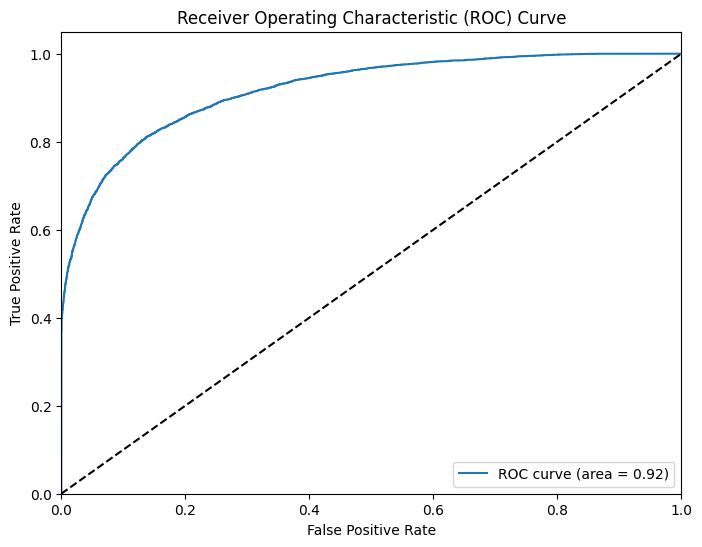

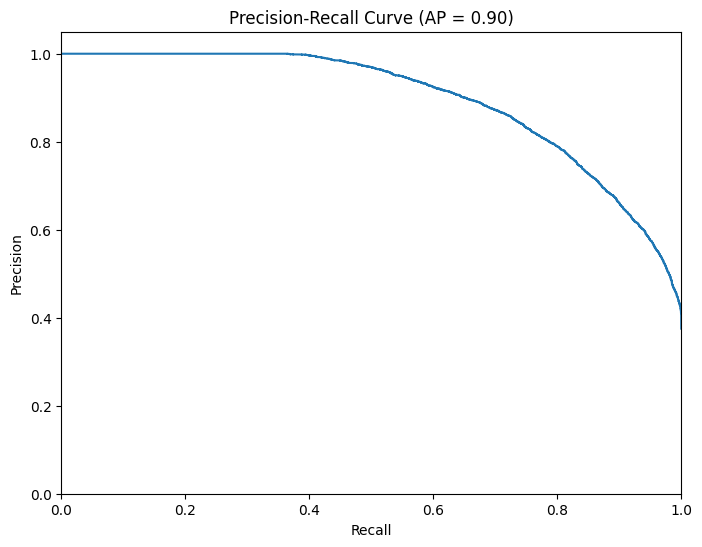

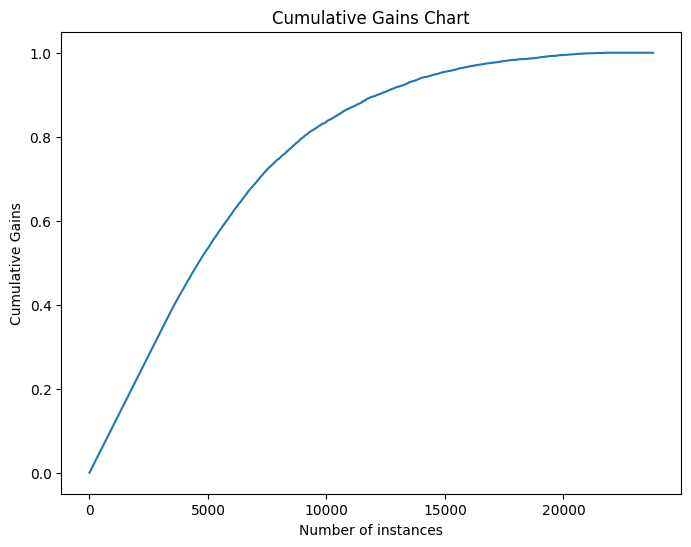

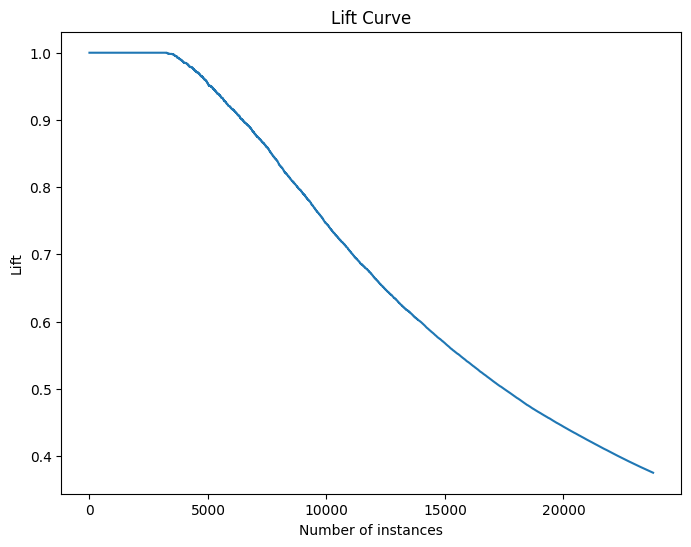

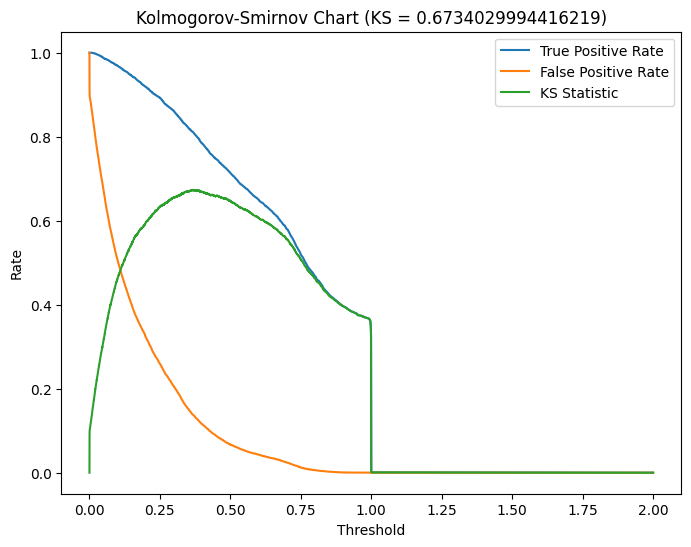

In [56]:
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score, matthews_corrcoef, roc_curve, auc, precision_recall_curve, average_precision_score, log_loss, brier_score_loss
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
xgb_train_predictions = xgb_model.predict(X_train)
xgb_test_predictions = xgb_model.predict(X_test)
xgb_test_probabilities = xgb_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# False Positive Rate
def false_positive_rate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    fp = cm[0, 1]
    tn = cm[0, 0]
    return fp / (fp + tn)

# False Negative Rate
def false_negative_rate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    fn = cm[1, 0]
    tp = cm[1, 1]
    return fn / (fn + tp)

# True Negative Rate
def true_negative_rate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0, 0]
    fp = cm[0, 1]
    return tn / (tn + fp)

# Negative Predictive Value
def negative_predictive_value(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0, 0]
    fn = cm[1, 0]
    return tn / (tn + fn)

# False Discovery Rate
def false_discovery_rate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    fp = cm[0, 1]
    tp = cm[1, 1]
    return fp / (fp + tp)

# True Positive Rate
def true_positive_rate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tp = cm[1, 1]
    fn = cm[1, 0]
    return tp / (tp + fn)

# Positive Predictive Value
def positive_predictive_value(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tp = cm[1, 1]
    fp = cm[0, 1]
    return tp / (tp + fp)

# Accuracy
def accuracy(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tp = cm[1, 1]
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]
    return (tp + tn) / (tp + tn + fp + fn)

# F beta score
def f_beta_score(y_true, y_pred, beta):
    precision = positive_predictive_value(y_true, y_pred)
    recall = true_positive_rate(y_true, y_pred)
    return (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

# F1 score
def f1_score(y_true, y_pred):
    return f_beta_score(y_true, y_pred, beta=1)

# F2 score
def f2_score(y_true, y_pred):
    return f_beta_score(y_true, y_pred, beta=2)

# Matthews Correlation Coefficient
def matthews_correlation_coefficient(y_true, y_pred):
    return matthews_corrcoef(y_true, y_pred)

# Precision-Recall Curve
def plot_precision_recall_curve(y_true, y_prob, figsize=(8, 6)):
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    average_precision = average_precision_score(y_true, y_prob)
    plt.figure(figsize=figsize)
    plt.step(recall, precision, where='post')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve (AP = {0:0.2f})'.format(average_precision))
    plt.show()

# ROC Curve
def plot_roc_curve(y_true, y_prob, figsize=(8, 6)):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=figsize)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Precision-Recall AUC
def pr_auc_score(y_true, y_prob):
    return average_precision_score(y_true, y_prob)

# Log loss
def calculate_log_loss(y_true, y_prob):
    return log_loss(y_true, y_prob)

# Brier score
def calculate_brier_score(y_true, y_prob):
    return brier_score_loss(y_true, y_prob)

# Cumulative gains chart
def plot_cumulative_gains_chart(y_true, y_prob, figsize=(8, 6)):
    sorted_prob = np.argsort(y_prob)[::-1]
    cumulative_positives = np.cumsum(y_true.to_numpy()[sorted_prob])  # Convert to NumPy array
    cumulative_gain = cumulative_positives / np.sum(y_true)
    plt.figure(figsize=figsize)
    plt.plot(np.arange(1, len(y_true) + 1), cumulative_gain)
    plt.xlabel('Number of instances')
    plt.ylabel('Cumulative Gains')
    plt.title('Cumulative Gains Chart')
    plt.show()

# Lift curve
def plot_lift_curve(y_true, y_prob, figsize=(8, 6)):
    sorted_prob = np.argsort(y_prob)[::-1]
    cumulative_positives = np.cumsum(y_true.to_numpy()[sorted_prob])  # Convert to NumPy array
    lift = cumulative_positives / np.arange(1, len(y_true) + 1)
    plt.figure(figsize=figsize)
    plt.plot(np.arange(1, len(y_true) + 1), lift)
    plt.xlabel('Number of instances')
    plt.ylabel('Lift')
    plt.title('Lift Curve')
    plt.show()

# Kolmogorov-Smirnov plot
def plot_ks_chart(y_true, y_prob, figsize=(8, 6)):
    plt.figure(figsize=figsize)
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    ks = np.max(np.abs(tpr - fpr))
    plt.plot(thresholds, tpr, label='True Positive Rate')
    plt.plot(thresholds, fpr, label='False Positive Rate')
    plt.plot(thresholds, np.abs(tpr - fpr), label='KS Statistic')
    plt.xlabel('Threshold')
    plt.ylabel('Rate')
    plt.title('Kolmogorov-Smirnov Chart (KS = {})'.format(ks))
    plt.legend()
    plt.show()

# Calculate metrics
def calculate_metrics(y_true, y_pred, y_prob):
    metrics = {
        "Confusion Matrix": confusion_matrix(y_true, y_pred),
        "False Positive Rate": false_positive_rate(y_true, y_pred),
        "False Negative Rate": false_negative_rate(y_true, y_pred),
        "True Negative Rate": true_negative_rate(y_true, y_pred),
        "Negative Predictive Value": negative_predictive_value(y_true, y_pred),
        "False Discovery Rate": false_discovery_rate(y_true, y_pred),
        "True Positive Rate": true_positive_rate(y_true, y_pred),
        "Positive Predictive Value": positive_predictive_value(y_true, y_pred),
        "Accuracy": accuracy(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "F2 Score": f2_score(y_true, y_pred),
        "Cohen's Kappa": cohen_kappa_score(y_true, y_pred),
        "Matthews Correlation Coefficient": matthews_correlation_coefficient(y_true, y_pred),
        "ROC AUC Score": roc_auc_score(y_true, y_prob),
        "Precision-Recall AUC Score": pr_auc_score(y_true, y_prob),
        "Log Loss": calculate_log_loss(y_true, y_prob),
        "Brier Score": calculate_brier_score(y_true, y_prob)
    }
    return metrics

# Print and plot metrics
def print_and_plot_metrics(metrics):
    for name, value in metrics.items():
        if isinstance(value, np.ndarray):
            print(name)
            print(value)
        else:
            print(f"{name}: {value}")
    # Plot ROC Curve
    plot_roc_curve(y_test, xgb_test_probabilities)
    # Plot Precision-Recall Curve
    plot_precision_recall_curve(y_test, xgb_test_probabilities)
    # Plot Cumulative Gains Chart
    plot_cumulative_gains_chart(y_test, xgb_test_probabilities)
    # Plot Lift Curve
    plot_lift_curve(y_test, xgb_test_probabilities)
    # Plot KS Chart
    plot_ks_chart(y_test, xgb_test_probabilities)

# Calculate and print metrics
metrics = calculate_metrics(y_test, xgb_test_predictions, xgb_test_probabilities)
print_and_plot_metrics(metrics)

XGBoost Hyperparameter Tuning with Random Search

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.8}
Confusion Matrix
[[13797  1062]
 [ 2148  6773]]
False Positive Rate: 0.07147183525136282
False Negative Rate: 0.2407801815939917
True Negative Rate: 0.9285281647486372
Negative Predictive Value: 0.8652869238005645
False Discovery Rate: 0.13554562858966177
True Positive Rate: 0.7592198184060083
Positive Predictive Value: 0.8644543714103382
Accuracy: 0.8650126156433978
F1 Score: 0.8084268321795177
F2 Score: 0.7781658585905007
Cohen's Kappa: 0.7048938975691434
Matthews Correlation Coefficient: 0.7084335565216805
ROC AUC Score: 0.9337353833504207
Precision-Recall AUC Score: 0.9139910973974111
Log Loss: 0.3046301138642032
Brier Score: 0.09576462160067503


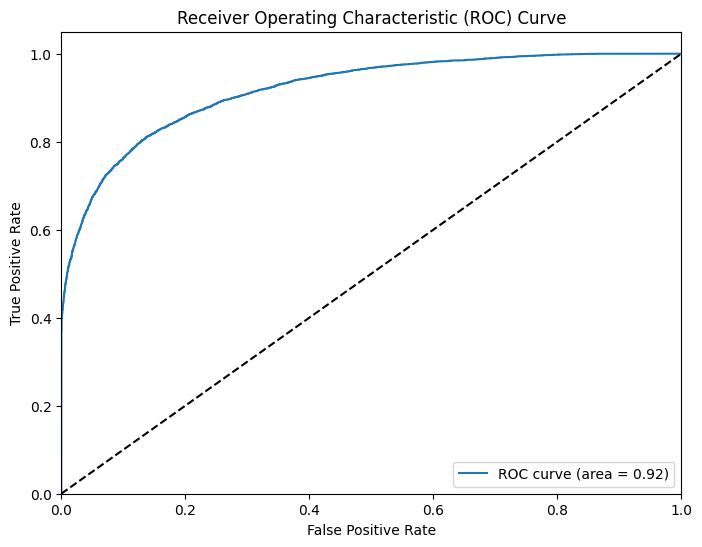

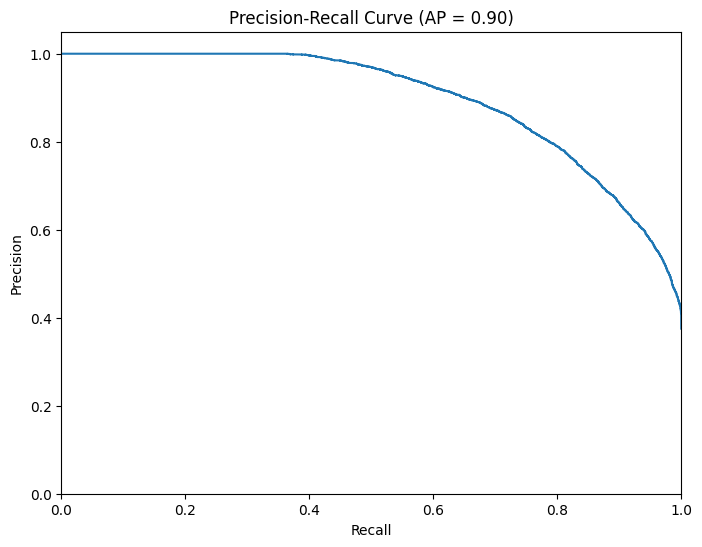

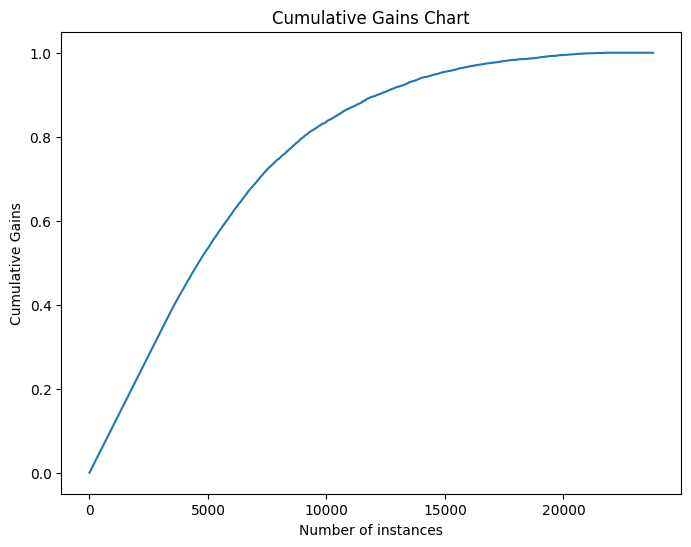

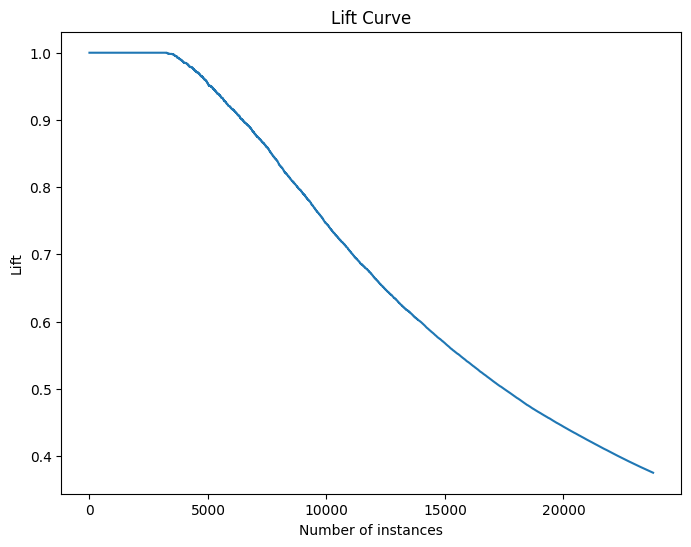

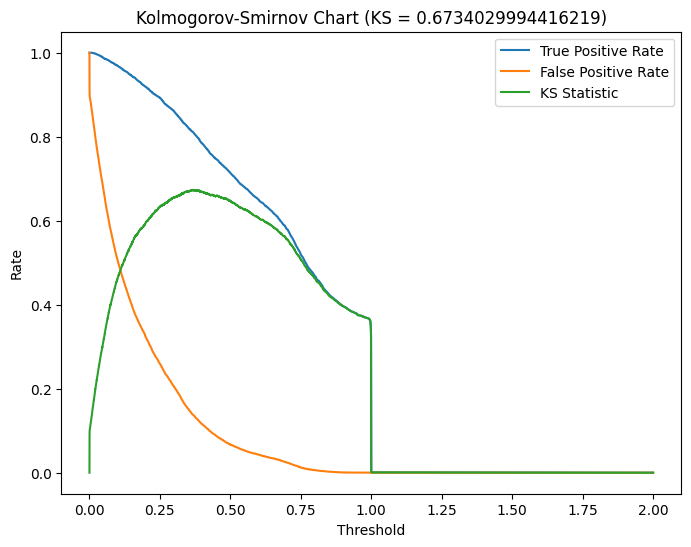

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define the parameter grid for random search
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'n_estimators': [100, 200, 300, 400, 500]
}

# Initialize the XGBoost classifier
xgb = XGBClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Perform random search
random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

# Get the best estimator
best_xgb_model = random_search.best_estimator_

# Predictions
best_xgb_train_predictions = best_xgb_model.predict(X_train)
best_xgb_test_predictions = best_xgb_model.predict(X_test)

# Calculate and print evaluation metrics for the best model
best_xgb_test_probabilities = best_xgb_model.predict_proba(X_test)[:, 1]
best_metrics = calculate_metrics(y_test, best_xgb_test_predictions, best_xgb_test_probabilities)
print_and_plot_metrics(best_metrics)